# Task 5 Analysis
---
### **Research Question**
Which region has the highest rise in temperature and precipitation throughout the year? 

## Temperature:
### **Data Processing**
#### *Loading Data*
To answer our research question, we loaded the data using our first method chain to keep helpful information by removing the null values. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import datetime as dt
import pandas_profiling as pdp

In [31]:
def load_and_process(url_or_path_to_csv_file):
    # Method Chain 1 (Load data, deal with missing data, and making data readable)
    df1 = (
        pd.read_csv(url_or_path_to_csv_file)
        .dropna()
        .rename(columns ={"LOCAL_DATE":"DATE"})
        .sort_values("DATE", ascending=False)
        .reset_index(drop = True)
        
      )
    return df1

In [32]:
df = load_and_process('Canadian_climate_history (1970-2020).csv')
df

,DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,9/9/99 00:00,14.2,0.0,14.5,1.0,23.3,0.0,22.0,1.2,23.40,...,10.3,0.4,20.8,3.0,15.1,0.2,7.2,1.4,10.00,1.60
1,9/9/98 00:00,12.1,0.0,11.0,0.6,15.0,0.0,14.4,0.0,15.80,...,20.8,0.0,14.0,0.0,14.5,0.0,5.4,0.0,21.40,0.00
2,9/9/95 00:00,13.2,0.0,15.3,0.0,14.8,0.6,10.9,0.0,13.00,...,12.7,3.3,12.9,0.0,16.5,0.0,11.8,1.9,9.70,0.00
3,9/9/94 00:00,13.0,0.0,13.1,9.8,16.6,0.0,15.4,5.0,14.40,...,15.0,2.0,14.8,0.0,13.2,10.8,7.1,6.0,22.40,0.00
4,9/9/93 00:00,12.1,0.0,11.9,0.0,18.2,0.0,15.8,1.3,16.70,...,10.0,8.4,15.8,4.8,19.2,0.0,11.9,0.2,10.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,1/1/04 00:00,-12.5,1.0,-16.4,3.7,-3.8,0.0,-6.4,0.0,-3.75,...,-1.1,1.0,1.2,0.0,1.6,0.0,-16.6,0.0,-10.10,0.35
13438,1/1/03 00:00,-6.1,0.0,-11.3,0.0,-0.1,0.9,-3.1,3.4,-3.80,...,-1.6,6.2,-3.7,0.0,5.9,21.6,-8.0,0.0,-10.10,0.00
13439,1/1/02 00:00,-15.0,0.0,-22.3,0.0,-7.5,0.0,-9.6,0.0,-10.60,...,-4.9,9.8,-5.9,0.0,3.9,11.6,-15.4,0.0,-13.50,0.00
13440,1/1/01 00:00,-0.2,0.0,-3.2,0.0,-1.4,0.0,-3.1,1.0,-8.70,...,0.0,1.8,-13.1,0.0,7.8,0.0,-5.9,0.0,-21.35,0.00


#### *Grouping cities to regions*
After dropping null values, we simplified our data by grouping the different cities into their regions using our second method chain. The method chain calculates the mean and combines all the cities into a region. The regions were divided into:
 - British Columbia 
 - The Prairie Provinces
 - Ontario 
 - Quebec 
 - The Atlantic Provinces 
 - The Northern Provinces
 
This simplifies the data as it summarizes the dataset, allowing us to analyze the data. 

In [33]:
def group_columns(df):
    df2 = (
        #create new columns that take mean temperature and percipitation from Atlantic Provinces 
        df
        .assign(TEMPERATURE_ATLANTIC = (df.iloc[:, [5, 7, 17]].mean(axis=1)).round(decimals=1))
        .assign(PRECIPITATION_ATLANTIC = (df.iloc[:, [6, 8, 18]].mean(axis=1)).round(decimals=1))
        
        #create new columns that take mean temperature and percipitation from Prairie provinces 
        .assign(TEMPERATURE_PRAIRIES = (df.iloc[:, [1, 3, 15, 25]].mean(axis=1)).round(decimals=1))
        .assign(PRECIPITATION_PRAIRIES = (df.iloc[:, [2, 4, 16, 26]].mean(axis=1)).round(decimals=1))
        
        #create new columns that take mean temperature and percipitation from cities in Ontario and merge into single column
        .assign(TEMPERATURE_ONTARIO = (df.iloc[:, [11, 19]].mean(axis=1)).round(decimals=1))
        .assign(PRECIPITATION_ONTARIO = (df.iloc[:, [12, 20]].mean(axis=1)).round(decimals=1))
        
         #create new columns that take mean temperature and percipitation from cities in Quebec and merge into single column
        .assign(TEMPERATURE_QUEBEC = (df.iloc[:, [9, 13]].mean(axis=1)).round(decimals=1))
        .assign(PRECIPITATION_QUEBEC = (df.iloc[:, [10, 14]].mean(axis=1)).round(decimals=1))
        
        #dropping columns that were amalgimated into the means
        .drop(columns = ['MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON', 
                         'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX', 'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
                        'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON', 'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
                        'MEAN_TEMPERATURE_WINNIPEG', 'TOTAL_PRECIPITATION_WINNIPEG', 'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
                        'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO', 'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
                        'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC'])
        
        #renaming columns to meet new location based naming
        .rename(columns ={"MEAN_TEMPERATURE_VANCOUVER":"TEMPERATURE_BRITISH_COLUMBIA"})
        .rename(columns ={"TOTAL_PRECIPITATION_VANCOUVER":"PRECIPITATION_BRITISH_COLUMBIA"})
        .rename(columns ={"MEAN_TEMPERATURE_WHITEHORSE":"TEMPERATURE_NORTHERN"})
        .rename(columns ={"TOTAL_PRECIPITATION_WHITEHORSE":"PRECIPITATION_NORTHERN"})
    )
        
    return df2

In [34]:
df = group_columns(df)
df

,DATE,TEMPERATURE_BRITISH_COLUMBIA,PRECIPITATION_BRITISH_COLUMBIA,TEMPERATURE_NORTHERN,PRECIPITATION_NORTHERN,TEMPERATURE_ATLANTIC,PRECIPITATION_ATLANTIC,TEMPERATURE_PRAIRIES,PRECIPITATION_PRAIRIES,TEMPERATURE_ONTARIO,PRECIPITATION_ONTARIO,TEMPERATURE_QUEBEC,PRECIPITATION_QUEBEC
0,9/9/99 00:00,15.1,0.2,7.2,1.4,18.5,0.5,12.2,0.6,21.4,7.9,21.8,5.8
1,9/9/98 00:00,14.5,0.0,5.4,0.0,16.7,0.0,16.3,0.3,14.5,0.0,14.2,6.0
2,9/9/95 00:00,16.5,0.0,11.8,1.9,12.8,1.3,13.0,0.0,12.8,0.0,12.3,0.0
3,9/9/94 00:00,13.2,10.8,7.1,6.0,15.7,2.3,16.8,2.4,13.4,0.0,13.6,7.7
4,9/9/93 00:00,19.2,0.0,11.9,0.2,14.7,3.2,11.6,0.0,15.6,4.6,15.8,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,1/1/04 00:00,1.6,0.0,-16.6,0.0,-3.8,0.3,-14.3,1.3,-1.3,0.0,-6.4,0.2
13438,1/1/03 00:00,5.9,21.6,-8.0,0.0,-1.6,3.5,-10.5,0.0,-4.6,0.0,-4.8,1.0
13439,1/1/02 00:00,3.9,11.6,-15.4,0.0,-7.3,3.3,-17.9,0.0,-8.6,0.0,-12.0,0.2
13440,1/1/01 00:00,7.8,0.0,-5.9,0.0,-1.5,0.9,-9.0,0.2,-12.4,0.0,-7.0,0.0


#### *Filtering Temperatures by Month*
To further simplify the data, we created a graph to display each region's temperature in a given month throughout the years. We did this by utilizing the melt() function to create a new dataset that allows us to use the hue() function in creating our line graph. The "DATE" column is used to filter the data to divide up the months, and the "YEAR" column is used as the x-axis of our line graph. The graph allows us to analyze the data to answer our research question through the graph as it presents the changes in temperature in a straightforward manner. 

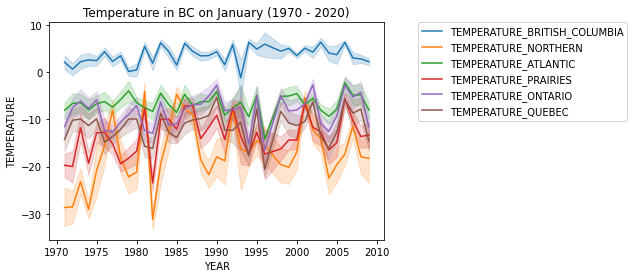

In [35]:
#Changing the date format to remove the time
df = df.assign(DATE = lambda x : x.DATE)
df["DATE"] = pd.to_datetime(df["DATE"], utc = True).dt.date
df.sort_values(by=['DATE'], inplace=True)

#Creating a new column to present only the year
df = df.assign(YEAR = lambda x : x.DATE)
df["YEAR"] = pd.to_datetime(df["YEAR"], utc = True).dt.year
df = df[df['YEAR'] < 2020]
df

#Melting the data so we can have the temperature and location as rows instead of columns
britishcolumbia = pd.melt(df, id_vars ='DATE', value_vars = 'TEMPERATURE_BRITISH_COLUMBIA')
northern = pd.melt(df, id_vars ='DATE', value_vars = 'TEMPERATURE_NORTHERN')
atlantic = pd.melt(df, id_vars ='DATE', value_vars = 'TEMPERATURE_ATLANTIC')
praries = pd.melt(df, id_vars ='DATE', value_vars = 'TEMPERATURE_PRAIRIES')
ontario = pd.melt(df, id_vars ='DATE', value_vars = 'TEMPERATURE_ONTARIO')
quebec = pd.melt(df, id_vars ='DATE', value_vars = 'TEMPERATURE_QUEBEC')

#Combining the data above into one dataset
combined = [britishcolumbia, northern, atlantic, praries, ontario, quebec]
df2 = pd.concat(combined)
df2 = df2.rename(columns ={"variable":"LOCATION"}).rename(columns ={"value":"TEMPERATURE"})
df2 = df2.assign(YEAR = lambda x : x.DATE)
df2["YEAR"] = pd.to_datetime(df2["YEAR"], utc = True).dt.year
df2 = df2[df2['YEAR'] < 2020]
df2

#Using the dataset to create the graph for January
df2['DATE'] = pd.to_datetime(df2['DATE'])
df_january_temp = df2[df2['DATE'].dt.month == 1]
sns.lineplot(data = df_january_temp,
           y = "TEMPERATURE",x = "YEAR", hue = "LOCATION",).set_title("Temperature in BC on January (1970 - 2020)")
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)

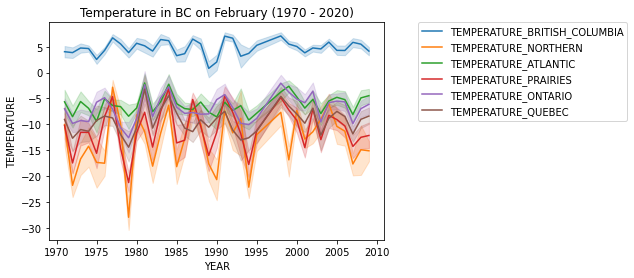

In [36]:
#Using the dataset to create the graph for February
df2['DATE'] = pd.to_datetime(df2['DATE'])
df_january_temp = df2[df2['DATE'].dt.month == 2]
sns.lineplot(data = df_january_temp,
           y = "TEMPERATURE",x = "YEAR", hue = "LOCATION").set_title("Temperature in BC on February (1970 - 2020)")
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)

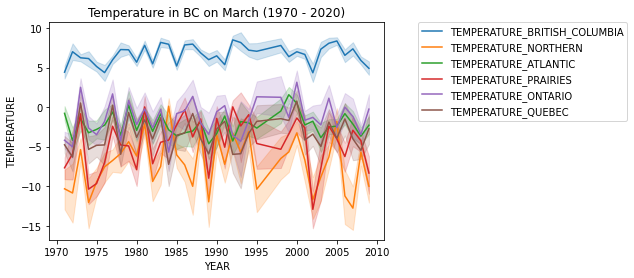

In [8]:
#Using the dataset to create the graph for March
df2['DATE'] = pd.to_datetime(df2['DATE'])
df_january_temp = df2[df2['DATE'].dt.month == 3]
sns.lineplot(data = df_january_temp,
           y = "TEMPERATURE",x = "YEAR", hue = "LOCATION").set_title("Temperature in BC on March (1970 - 2020)")
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)

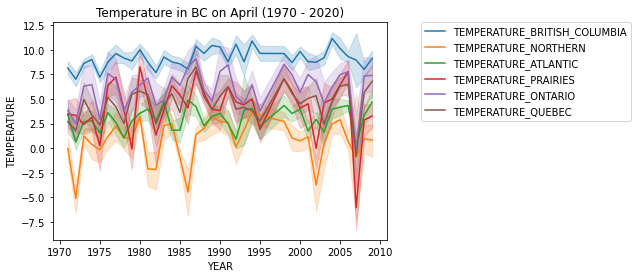

In [9]:
#Using the dataset to create the graph for April
df2['DATE'] = pd.to_datetime(df2['DATE'])
df_january_temp = df2[df2['DATE'].dt.month == 4]
sns.lineplot(data = df_january_temp,
           y = "TEMPERATURE",x = "YEAR", hue = "LOCATION").set_title("Temperature in BC on April (1970 - 2020)")
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)

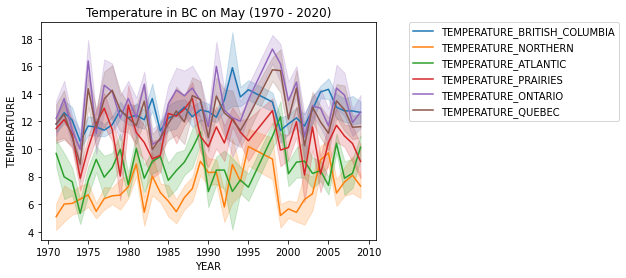

In [10]:
#Using the dataset to create the graph for May
df2['DATE'] = pd.to_datetime(df2['DATE'])
df_january_temp = df2[df2['DATE'].dt.month == 5]
sns.lineplot(data = df_january_temp,
           y = "TEMPERATURE",x = "YEAR", hue = "LOCATION").set_title("Temperature in BC on May (1970 - 2020)")
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)

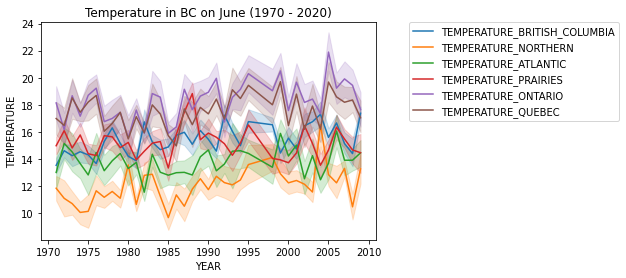

In [11]:
#Using the dataset to create the graph for June
df2['DATE'] = pd.to_datetime(df2['DATE'])
df_january_temp = df2[df2['DATE'].dt.month == 6]
sns.lineplot(data = df_january_temp,
           y = "TEMPERATURE",x = "YEAR", hue = "LOCATION").set_title("Temperature in BC on June (1970 - 2020)")
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)

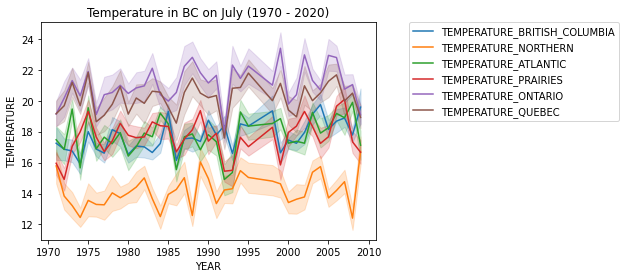

In [12]:
#Using the dataset to create the graph for July
df2['DATE'] = pd.to_datetime(df2['DATE'])
df_january_temp = df2[df2['DATE'].dt.month == 7]
sns.lineplot(data = df_january_temp,
           y = "TEMPERATURE",x = "YEAR", hue = "LOCATION").set_title("Temperature in BC on July (1970 - 2020)")
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)

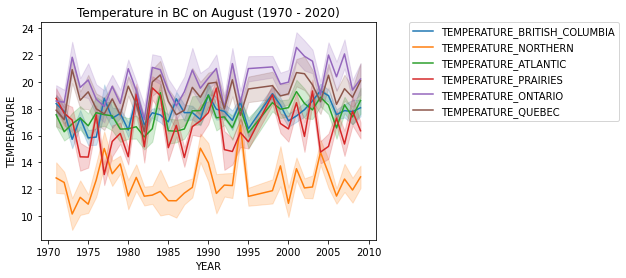

In [13]:
#Using the dataset to create the graph for August
df2['DATE'] = pd.to_datetime(df2['DATE'])
df_january_temp = df2[df2['DATE'].dt.month == 8]
sns.lineplot(data = df_january_temp,
           y = "TEMPERATURE",x = "YEAR", hue = "LOCATION").set_title("Temperature in BC on August (1970 - 2020)")
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)

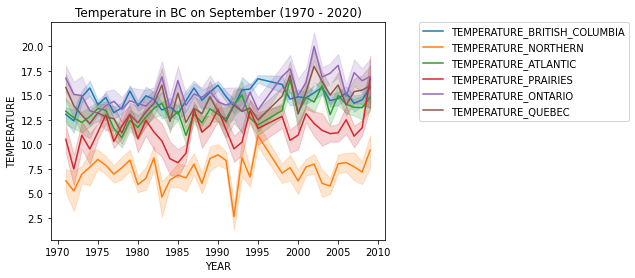

In [14]:
#Using the dataset to create the graph for September
df2['DATE'] = pd.to_datetime(df2['DATE'])
df_january_temp = df2[df2['DATE'].dt.month == 9]
sns.lineplot(data = df_january_temp,
           y = "TEMPERATURE",x = "YEAR", hue = "LOCATION").set_title("Temperature in BC on September (1970 - 2020)")
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)

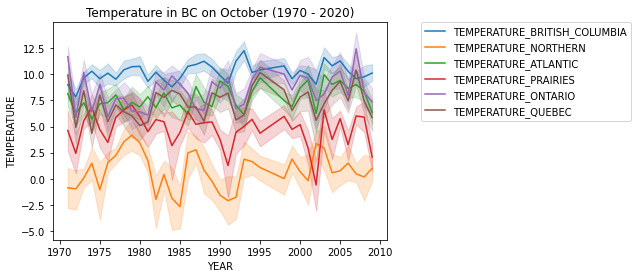

In [15]:
#Using the dataset to create the graph for October
df2['DATE'] = pd.to_datetime(df2['DATE'])
df_january_temp = df2[df2['DATE'].dt.month == 10]
sns.lineplot(data = df_january_temp,
           y = "TEMPERATURE",x = "YEAR", hue = "LOCATION").set_title("Temperature in BC on October (1970 - 2020)")
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)

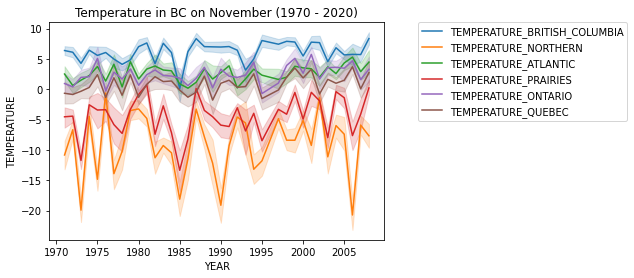

In [16]:
#Using the dataset to create the graph for November
df2['DATE'] = pd.to_datetime(df2['DATE'])
df_january_temp = df2[df2['DATE'].dt.month == 11]
sns.lineplot(data = df_january_temp,
           y = "TEMPERATURE",x = "YEAR", hue = "LOCATION").set_title("Temperature in BC on November (1970 - 2020)")
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)

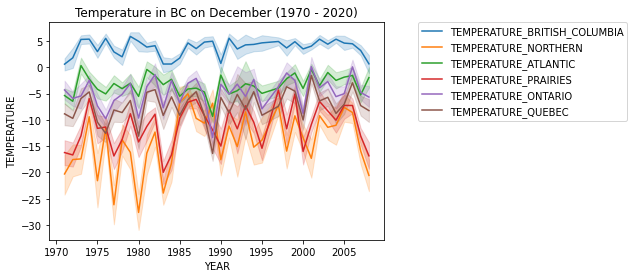

In [17]:
#Using the dataset to create the graph for December
df2['DATE'] = pd.to_datetime(df2['DATE'])
df_january_temp = df2[df2['DATE'].dt.month == 12]
sns.lineplot(data = df_january_temp,
           y = "TEMPERATURE",x = "YEAR", hue = "LOCATION").set_title("Temperature in BC on December (1970 - 2020)")
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)

#### *Describing the Dataset*
Since the graph only showed us the temperature changes trend, we used the describe() function to get a precise number in the change of temperature. 

In [18]:
df.describe()

,TEMPERATURE_BRITISH_COLUMBIA,PRECIPITATION_BRITISH_COLUMBIA,TEMPERATURE_NORTHERN,PRECIPITATION_NORTHERN,TEMPERATURE_ATLANTIC,PERCIPITATION_ATLANTIC,TEMPERATURE_PRAIRIES,PERCIPITATION_PRAIRIES,TEMPERATURE_ONTARIO,PERCIPITATION_ONTARIO,TEMPERATURE_QUEBEC,PERCIPITATION_QUEBEC,YEAR
count,13077.000000,13077.000000,13077.000000,13077.000000,13077.000000,13077.000000,13077.000000,13077.000000,13077.000000,13077.000000,13077.000000,13077.000000,13077.000000
mean,10.233356,3.213971,-0.441829,0.740361,5.583429,3.810759,3.094846,1.190847,7.052000,2.381586,5.461696,2.977288,1989.361780
std,5.770064,6.599719,12.765614,1.997024,9.369555,6.036920,12.355683,2.397458,11.321349,4.831870,11.975685,5.848385,11.439807
min,-11.500000,0.000000,-46.700000,0.000000,-21.700000,0.000000,-36.600000,0.000000,-27.100000,0.000000,-30.000000,0.000000,1971.000000
25%,6.000000,0.000000,-8.200000,0.000000,-1.500000,0.100000,-5.800000,0.000000,-1.600000,0.000000,-3.600000,0.000000,1979.000000
50%,10.000000,0.000000,1.800000,0.000000,5.800000,1.300000,4.900000,0.200000,7.600000,0.200000,6.400000,0.300000,1988.000000
75%,15.000000,3.600000,9.800000,0.400000,13.600000,4.900000,13.800000,1.300000,17.000000,2.500000,15.900000,3.200000,2000.000000
max,28.400000,91.600000,23.900000,44.900000,24.300000,80.600000,25.400000,34.500000,30.400000,76.100000,28.600000,81.600000,2009.000000


## Precipitation: 
---

#### *Grouping Precipitation by Region:* 

In [65]:
#Splitting Up the Locations
britishcolumbia_p = pd.melt(df, id_vars ='DATE', value_vars = 'PRECIPITATION_BRITISH_COLUMBIA')
northern_p = pd.melt(df, id_vars ='DATE', value_vars = 'PRECIPITATION_NORTHERN')
atlantic_p = pd.melt(df, id_vars ='DATE', value_vars = 'PRECIPITATION_ATLANTIC')
praries_p = pd.melt(df, id_vars ='DATE', value_vars = 'PRECIPITATION_PRAIRIES')
ontario_p = pd.melt(df, id_vars ='DATE', value_vars = 'PRECIPITATION_ONTARIO')
quebec_p = pd.melt(df, id_vars ='DATE', value_vars = 'PRECIPITATION_QUEBEC')

#### *Creating Location Based Precipitation Plots:*

**British Columbia:**

In [68]:
#Grouping the data by year and then taking the average of each year
britishcolumbia_p = britishcolumbia_p.assign(YEAR = lambda x : x.DATE)
britishcolumbia_p["YEAR"] = pd.to_datetime(britishcolumbia_p["YEAR"], utc = True).dt.year
britishcolumbia_p = britishcolumbia_p[britishcolumbia_p['YEAR'] < 2020]
britishcolumbia_p.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})

,PRECIPITATION
YEAR,
1971,3.656986
1972,3.398361
1973,2.739178
1974,3.420274
1975,3.616712
1976,2.754918
1977,2.828219
1978,2.785753
1979,2.622129


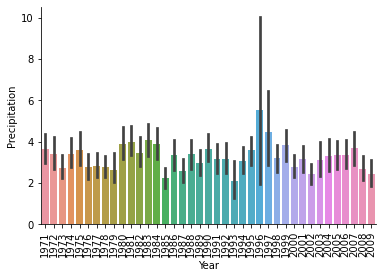

In [69]:
#Making a barplot
sns.barplot(data = britishcolumbia_p, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

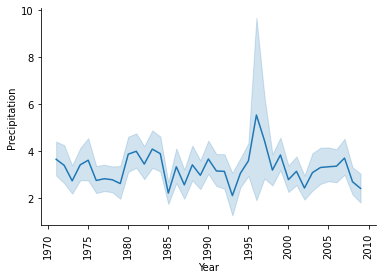

In [22]:
sns.lineplot(data = britishcolumbia_p, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

In [85]:
britishcolumbia_p.describe()

,value,YEAR
count,13077.000000,13077.000000
mean,3.213971,1989.361780
std,6.599719,11.439807
min,0.000000,1971.000000
25%,0.000000,1979.000000
50%,0.000000,1988.000000
75%,3.600000,2000.000000
max,91.600000,2009.000000


**Northern Provinces:**

In [23]:
#Grouping the data by year and then taking the average of each year
northern_p = northern_p.assign(YEAR = lambda x : x.DATE)
northern_p["YEAR"] = pd.to_datetime(northern_p["YEAR"], utc = True).dt.year
northern_p = northern_p[northern_p['YEAR'] < 2020]
northern_p.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})

,PRECIPITATION
YEAR,
1971,0.725205
1972,0.801639
1973,0.590685
1974,1.005753
1975,0.850411
1976,0.601093
1977,0.869863
1978,0.571507
1979,0.721289


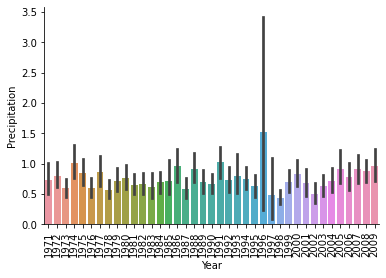

In [24]:
sns.barplot(data = northern_p, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

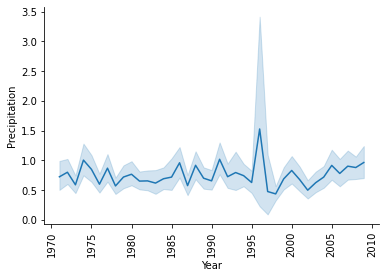

In [25]:
sns.lineplot(data = northern_p, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

In [86]:
northern_p.describe()

,value,YEAR
count,13077.000000,13077.000000
mean,0.740361,1989.361780
std,1.997024,11.439807
min,0.000000,1971.000000
25%,0.000000,1979.000000
50%,0.000000,1988.000000
75%,0.400000,2000.000000
max,44.900000,2009.000000


**Atlantic Provinces:**

In [38]:
#Grouping the data by year and then taking the average of each year
atlantic_p = atlantic_p.assign(YEAR = lambda x : x.DATE)
atlantic_p["YEAR"] = pd.to_datetime(atlantic_p["YEAR"], utc = True).dt.year
atlantic_p = atlantic_p[atlantic_p['YEAR'] < 2020]
atlantic_p.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})

,PRECIPITATION
YEAR,
1971,4.106027
1972,4.429235
1973,3.744384
1974,3.870685
1975,3.723288
1976,3.938525
1977,4.007397
1978,3.470959
1979,4.569748


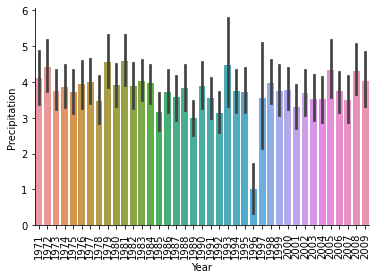

In [39]:
sns.barplot(data = atlantic_p, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

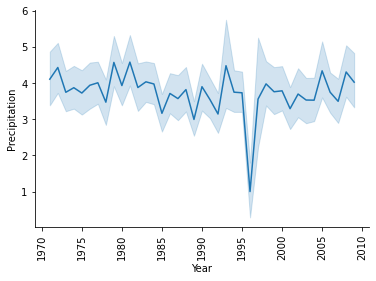

In [40]:
sns.lineplot(data = atlantic_p, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

In [87]:
atlantic_p.describe()

,value,YEAR
count,13077.000000,13077.000000
mean,3.810759,1989.361780
std,6.036920,11.439807
min,0.000000,1971.000000
25%,0.100000,1979.000000
50%,1.300000,1988.000000
75%,4.900000,2000.000000
max,80.600000,2009.000000


**Prairie Provinces:**

In [41]:
#Grouping the data by year and then taking the average of each year
praries_p = praries_p.assign(YEAR = lambda x : x.DATE)
praries_p["YEAR"] = pd.to_datetime(praries_p["YEAR"], utc = True).dt.year
praries_p = praries_p[praries_p['YEAR'] < 2020]
praries_p.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})

,PRECIPITATION
YEAR,
1971,1.177260
1972,1.211202
1973,1.339178
1974,1.211507
1975,1.223014
1976,1.078962
1977,1.309863
1978,1.281644
1979,1.029412


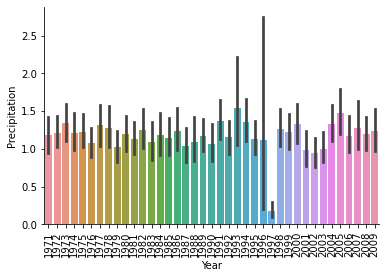

In [42]:
sns.barplot(data = praries_p, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

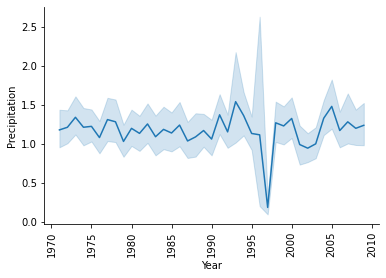

In [43]:
sns.lineplot(data = praries_p, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

In [89]:
praries_p.describe()

,value,YEAR
count,13077.000000,13077.000000
mean,1.190847,1989.361780
std,2.397458,11.439807
min,0.000000,1971.000000
25%,0.000000,1979.000000
50%,0.200000,1988.000000
75%,1.300000,2000.000000
max,34.500000,2009.000000


**Ontario:**

In [44]:
#Grouping the data by year and then taking the average of each year
ontario_p = ontario_p.assign(YEAR = lambda x : x.DATE)
ontario_p["YEAR"] = pd.to_datetime(ontario_p["YEAR"], utc = True).dt.year
ontario_p = ontario_p[ontario_p['YEAR'] < 2020]
ontario_p.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})

,PRECIPITATION
YEAR,
1971,2.187123
1972,2.763934
1973,2.590411
1974,2.244658
1975,2.295616
1976,2.287978
1977,2.715068
1978,2.119452
1979,2.744258


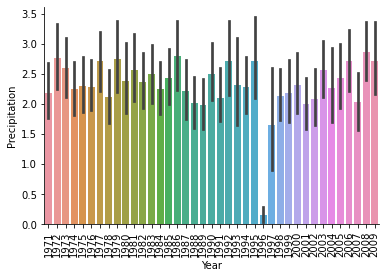

In [45]:
sns.barplot(data = ontario_p, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

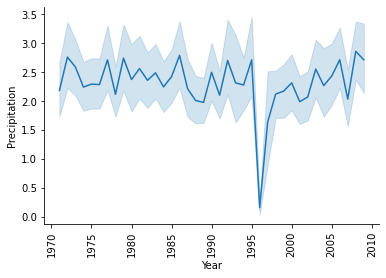

In [46]:
sns.lineplot(data = ontario_p, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

In [90]:
ontario_p.describe()

,value,YEAR
count,13077.000000,13077.000000
mean,2.381586,1989.361780
std,4.831870,11.439807
min,0.000000,1971.000000
25%,0.000000,1979.000000
50%,0.200000,1988.000000
75%,2.500000,2000.000000
max,76.100000,2009.000000


**Quebec:**

In [47]:
#Grouping the data by year and then taking the average of each year
quebec_p = quebec_p.assign(YEAR = lambda x : x.DATE)
quebec_p["YEAR"] = pd.to_datetime(quebec_p["YEAR"], utc = True).dt.year
quebec_p = quebec_p[quebec_p['YEAR'] < 2020]
quebec_p.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})

,PRECIPITATION
YEAR,
1971,2.847945
1972,3.481967
1973,3.577534
1974,2.978630
1975,3.318904
1976,3.498087
1977,2.934247
1978,2.701370
1979,3.049300


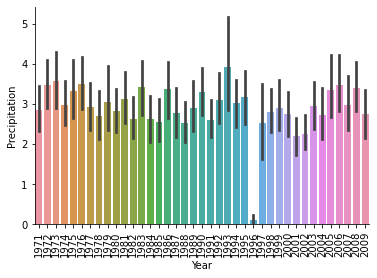

In [48]:
sns.barplot(data = quebec_p, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

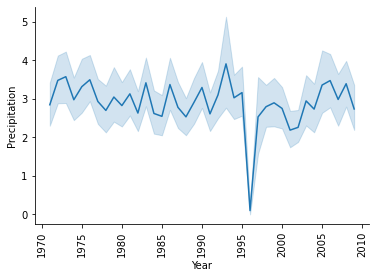

In [51]:
sns.lineplot(data = quebec_p, x="YEAR", y="value")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
sns.despine()

In [91]:
quebec_p.describe()

,value,YEAR
count,13077.000000,13077.000000
mean,2.977288,1989.361780
std,5.848385,11.439807
min,0.000000,1971.000000
25%,0.000000,1979.000000
50%,0.300000,1988.000000
75%,3.200000,2000.000000
max,81.600000,2009.000000


### Making A Single Countrywide Line Plot:
---

**Adding the location to act as a hue:**

In [80]:
#British Columbia
britishcolumbia_p = britishcolumbia_p.assign(YEAR = lambda x : x.DATE)
britishcolumbia_p["YEAR"] = pd.to_datetime(britishcolumbia_p["YEAR"], utc = True).dt.year
bc = britishcolumbia_p.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})
bc['LOCATION'] = 'British Columbia'
#Northern Provinces
northern_p = northern_p.assign(YEAR = lambda x : x.DATE)
northern_p["YEAR"] = pd.to_datetime(northern_p["YEAR"], utc = True).dt.year
nor = northern_p.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})
nor['LOCATION'] = 'Northern Provinces'
#Atlantic Provinces 
atlantic_p = atlantic_p.assign(YEAR = lambda x : x.DATE)
atlantic_p["YEAR"] = pd.to_datetime(atlantic_p["YEAR"], utc = True).dt.year
atl = atlantic_p.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})
atl['LOCATION'] = 'Atlantic Provinces'
#Prairie Provinces 
praries_p = praries_p.assign(YEAR = lambda x : x.DATE)
praries_p["YEAR"] = pd.to_datetime(praries_p["YEAR"], utc = True).dt.year
pra = praries_p.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})
pra['LOCATION'] = 'Prairie Provinces'
#Ontario
ontario_p = ontario_p.assign(YEAR = lambda x : x.DATE)
ontario_p["YEAR"] = pd.to_datetime(ontario_p["YEAR"], utc = True).dt.year
ont = ontario_p.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})
ont['LOCATION'] = 'Ontario'
#Quebec
quebec_p = quebec_p.assign(YEAR = lambda x : x.DATE)
quebec_p["YEAR"] = pd.to_datetime(quebec_p["YEAR"], utc = True).dt.year
que = quebec_p.groupby(by = ['YEAR']).mean(['PRECIPITATION']).rename(columns={"value": "PRECIPITATION"})
que['LOCATION'] = 'Quebec'

**Combining the Locations:**

In [92]:
combined = [bc, nor, atl, pra, ont, que]
canada_precipitation = pd.concat(combined)
canada_precipitation

,PRECIPITATION,LOCATION
YEAR,,
1971,3.656986,British Columbia
1972,3.398361,British Columbia
1973,2.739178,British Columbia
1974,3.420274,British Columbia
1975,3.616712,British Columbia
...,...,...
2005,3.360989,Quebec
2006,3.476648,Quebec
2007,2.986420,Quebec


**Final Plot Showing Countrywide Precipitation:**

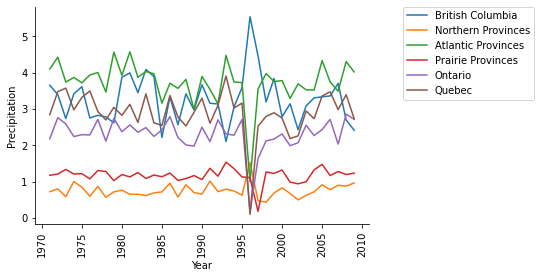

In [84]:
sns.lineplot(data = canada_precipitation, x="YEAR", y="PRECIPITATION", hue = "LOCATION")
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.xlabel('Year')
plt.legend(bbox_to_anchor = (1.1 , 1), borderaxespad = 0)
sns.despine()

### **Our Analysis**
*Temperature*

Through the summarized dataset above, British Columbia has the highest temperature, with an average of 10 degrees from 1970 - 2010. On the other hand, the Northern Region has the lowest average temperature from 1970 - 2010 with -0.44 degrees. Moreover, when looking at the graph, British Columbia's temperature is higher than other regions in the earlier months of the year. However, in the middle of the year, Ontario and Quebec have the highest temperature until September.

Nevertheless, BC returns as the region with the highest temperature in the late months of the year. Although BC has the highest average temperature, it does not have the highest rise in temperature.
The line graph shows a mild fluctuation in BC; this shows that BC has the slightest temperature rise than other regions throughout the year. Furthermore, when calculating the difference between the highest and lowest temperature of the regions using the summarized dataset, BC has the lowest change with 39 degrees. On the other hand, the graph shows that Northern Region has a tremendous fluctuation of temperature throughout the years; this shows that the Northern Region has the highest temperature rise.  To further support the statement, when calculating the difference between the lowest and highest temperature, the Northern Region has a change of 69 degrees Celcius. 

Although the difference between the lowest and highest temperature can show the temperature rise, it does not consider the different weathers throughout the year, which questions the reliability of the data. Therefore, we must observe the graph's fluctuation instead to obtain a more accurate result for our conclusion.

*Precipitation*

Through the summarized data above, it's seen that the Atlantic provinces have the highest average percipitation with a value of 3.8mm. In some years, British Columbia has a higher average precipitation. However, the total mean of precipitation of British Columbia is 3.2mm. The Northern provinces were found to have the lowest precipitation across all years with a total mean precipitation of 0.7mm. It is important to note that in all datasets a strange pattern was observed from 1995-1997. This is do to the removal of null values, which altered the average precipitation readings from those years. 

Our analysis of the precipitarion data shows no change in the trends of precipitation patterns in any of the selected climate zones. The data remains consistent throughout the selected time period. Therefore, it is not possible to make any conclusions about increasing precipitation as no changes were witnessed. 

### **Our Conclusion**

In conclusion, our analysis shows that the Northern Region has the highest rise in temperature as it shows the most fluctuation in the graph. There was no found change in precipitation patterns in any of the selected climate zones. 

We would like to acknowledge that after filtering our data, the dataset only presents value until 2010. Although this may be outdated, we can study our dataset's trend to predict the rise of temperature in the future. Nevertheless, our data helps present the region with the most drastic temperature change; this will allow further research to find a correlation between the social, economic, political, and environmental data and apply the correlation to our data in finding the trend. 